In [2]:
import sys
sys.path.append('../Codes/')
sys.path.append('../Codes/Python/')
import numpy as np
import matplotlib.pyplot as plt
from Immuno_models import*
#from Bio import Phylo
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return a - b*(x-c)**2

Text_files_path = '../../../../Dropbox/Research/Evolution_Immune_System/Text_files/'

N_A = 6.02214076e23
k_BT = 1.380649e-23*293
style.use('seaborn-paper')
print(style.available)
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


# Ising Model

In [3]:
data=(np.loadtxt('../Codes/Ising_model/output.txt'))
E = data[:,0]

# $H(\vec{s}) = \sum{s_i}$
# $\frac{\binom{L}{k}}{2^{L}}$

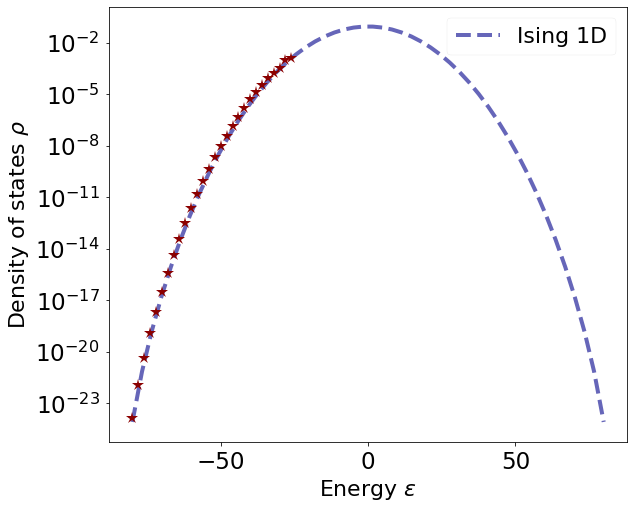

In [4]:
fig, ax = plt.subplots(figsize = (10,8), gridspec_kw={'left':0.18})
L = 80
ds = np.linspace(0, L );
data_E = np.histogram(E, bins = 'auto', density = True);
#ax.plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);+
#ax.plot(data_E[1][:-1], (2**(50))**(-1)*np.exp(-data_E[1][:-1]/1)*sc.comb(L, (data_E[1][:-1]+L)/2), color = 'olive', linestyle = '--', marker = '', ms = 10);
ax.plot(ds*2-L, sc.comb(L, ds)/2**(L) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--', alpha = 0.6);
ax.plot(data_E[1][:-1], data_E[0]/(1e10*(2**(L))**(-1)*np.exp(-data_E[1][:-1]/1)), color = 'darkred', linestyle = '', marker = '*', ms = 12);

ax.set_yscale('log');
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)
fig.savefig('../Figures/Dimensionality/Ising.png')


In [5]:
print('%.2e'%(2**80),'%.2e'%(len(E)))

1.21e+24 8.00e+06


# NetMHC

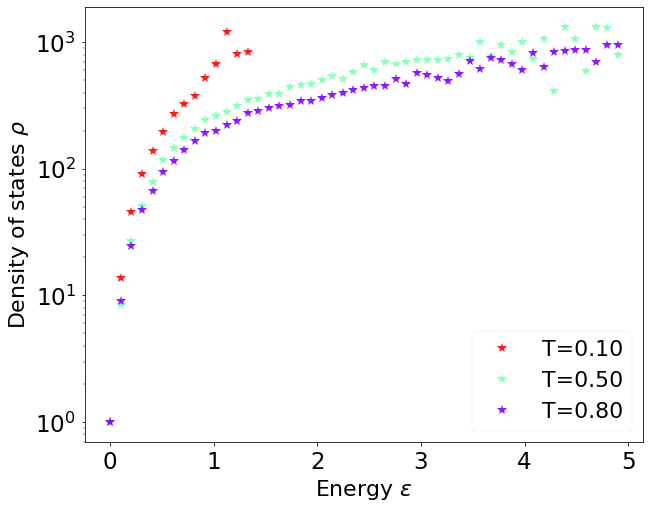

In [90]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
Ts = np.array([0.1, 0.5, 0.8])
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ts))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
for i, T in enumerate(Ts):
    energies = (np.loadtxt('../../../../Dropbox/Simulations_Tail/tail_%.1f.txt'%(T)))
    energies = energies - np.min(energies)
    ds = np.linspace(0, L);
    data_E = np.histogram(energies, bins = np.linspace(0,5,50), density = False);
    #data_E = np.histogram(energies, bins ='auto', density = False);
    #E_0s = np.append(E_0s, data_E[0][0]/(np.exp(-data_E[1][0]/T)))
    ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[1].plot(data_E_2[1][:-1], (data_E_2[0]/(np.exp(-data_E_2[1][:-1]/T)))/(data_E_2[0][0]/(np.exp(-data_E_2[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[0].plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);
    
#ax.set_xlim(np.min(energies)-.2,np.min(energies)+3)
#ax.set_ylim(.5,1e4)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)

fig.savefig('../Figures/Dimensionality/NetMHC.png')



# MJ Matrix

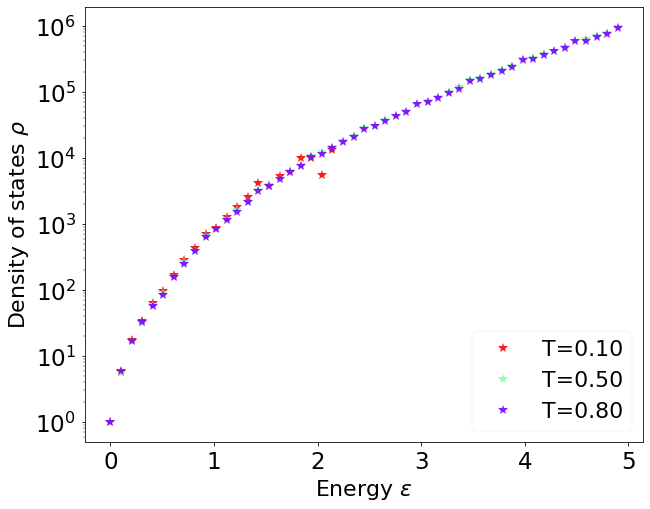

In [105]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
antigen = 'YLASGGQPI'
L = 9
N = 1e7
Ts = np.array([0.1, 0.5, 0.8])
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ts))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
for i, T in enumerate(Ts):
    energies = (np.loadtxt(Text_files_path + 'MCMC/energies_L-%d_T-%.6f_N-%d_Antigen-'%(L, T, N)+antigen+'.txt'))
    energies = energies - np.min(energies)
    data_E = np.histogram(energies, bins = np.linspace(0, 5, 50), density = False);
    #data_E = np.histogram(energies, bins ='auto', density = False);
    #E_0s = np.append(E_0s, data_E[0][0]/(np.exp(-data_E[1][0]/T)))
    ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/T)))/(data_E[0][0]/(np.exp(-data_E[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[1].plot(data_E_2[1][:-1], (data_E_2[0]/(np.exp(-data_E_2[1][:-1]/T)))/(data_E_2[0][0]/(np.exp(-data_E_2[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax[0].plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);
    
#ax.set_xlim(np.min(energies)-.2,np.min(energies)+3)
#ax.set_ylim(.5,2e4)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)

fig.savefig('../Figures/Dimensionality/MJ.png')

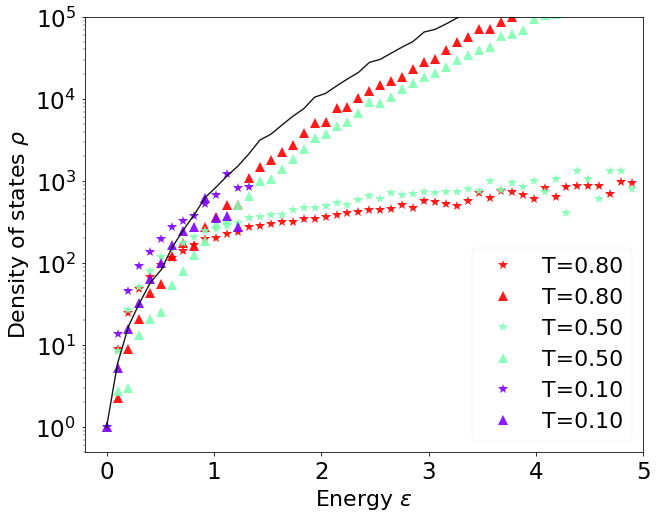

In [108]:
fig, ax = plt.subplots(1, 1, figsize = (10,8))
N = 1e5
Ts = np.flip(np.array([0.1, 0.5, 0.8]))
colors = np.flip(plt.cm.rainbow(np.linspace(0,1,len(Ts))), axis = 0)
markers = ['^', 'o', 's', '*', 'x']
E_0s = np.array([])
for i, T in enumerate(Ts):
    energies1 = (np.loadtxt('../../../../Dropbox/Simulations_Tail/tail_%.1f.txt'%(T)))
    energies1 = energies1 - np.min(energies1)
    data_E1 = np.histogram(energies1, bins = np.linspace(0,5,50), density = False);
    ax.plot(data_E1[1][:-1], (data_E1[0]/(np.exp(-data_E1[1][:-1]/T)))/(data_E1[0][0]/(np.exp(-data_E1[1][0]/T))), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax.plot(data_E1[1][:-1], (data_E1[0]), color = colors[i], linestyle = '', marker = '*', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    
    energies2 = (np.loadtxt(Text_files_path + 'MCMC/energies_L-%d_T-%.6f_N-%d_Antigen-'%(L, T, N)+antigen+'.txt'))
    energies2 = energies2 - np.min(energies2)
    data_E2 = np.histogram(energies2, bins = np.linspace(0,5,50), density = False);
    ax.plot(data_E2[1][:-1], (data_E2[0]/(np.exp(-data_E2[1][:-1]/T)))/(data_E2[0][0]/(np.exp(-data_E2[1][0]/T))), color = colors[i], linestyle = '', marker = '^', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    #ax.plot(data_E2[1][:-1], (data_E2[0]), color = colors[i], linestyle = '', marker = '^', ms = 10, alpha = 0.9, label = "T=%.2f"%(T));
    
    
ax.plot(data_E[1][:-1], (data_E[0]/(np.exp(-data_E[1][:-1]/.8)))/(data_E[0][0]/(np.exp(-data_E[1][0]/.8))), color = 'k', linestyle = '-', marker = '', ms = 10, alpha = 0.9);
    
ax.set_xlim(np.min(energies1)-.2,np.min(energies1)+5)
ax.set_ylim(.5,1e5)
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 4, fontsize = 22)

fig.savefig('../Figures/Dimensionality/comparison.png')

